In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [10]:
data = pd.read_csv("eval_data.csv")
data.head()

C:\Users\Nathaniel\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,ranked,agent_type,kind,tls_id,episode,cum_reward,reward,step
0,0,True,ppo,fedrl,gneJ0,1,0.0,-0.0,0
1,1,True,ppo,fedrl,gneJ1,1,0.0,-0.0,0
2,2,True,ppo,fedrl,gneJ13,1,0.0,-0.0,0
3,3,True,ppo,fedrl,gneJ2,1,0.0,-0.0,0
4,4,True,ppo,fedrl,gneJ3,1,0.0,-0.0,0


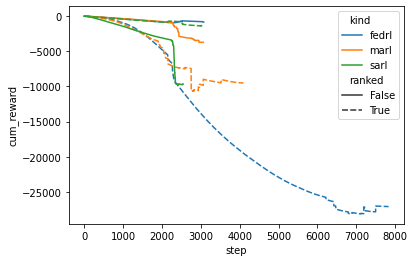

In [14]:
sns.lineplot(data=data, style="ranked", hue="kind", x="step", y="cum_reward", ci=None)
plt.savefig("reward_over_time.pdf")
plt.show()

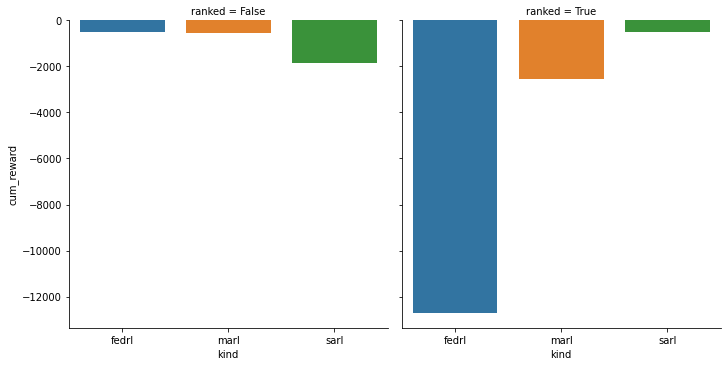

In [13]:
sns.catplot(data=data, kind="bar", col="ranked", x="kind", y="cum_reward", ci=None)
plt.savefig("ranked_v_unranked.pdf")
plt.show()